In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leaf_data = pd.read_csv("train.csv", low_memory=False)

In [3]:
leaf_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
margin5,990.0,0.014264,0.018390,0.0,0.001953,0.007812,0.017578,0.111330
margin6,990.0,0.038579,0.052030,0.0,0.000000,0.015625,0.056153,0.310550
margin7,990.0,0.019202,0.017511,0.0,0.005859,0.015625,0.029297,0.091797
margin8,990.0,0.001083,0.002743,0.0,0.000000,0.000000,0.000000,0.031250
margin9,990.0,0.007167,0.008933,0.0,0.001953,0.005859,0.007812,0.076172


In [4]:
leaf_data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.000000,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.000000,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.000000,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.000000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.000000,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.000000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.000000,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.000000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.000000,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.000000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.192380,0.000000,0.074219,0.000000,0.000000


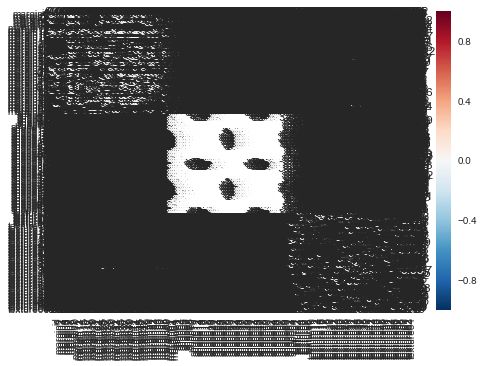

In [6]:
sns.set()
# Performing pair wise correlation on the features
leaf_correlation = leaf_data.corr()
sns.heatmap(leaf_correlation, annot=True)
plt.show()

In [7]:
leaf_names = dict()
unique_leaves = leaf_data["species"].unique()
for i in range(99):
    leaf_names[unique_leaves[i]] = i


In [8]:
leaf_names

{'Acer_Capillipes': 70,
 'Acer_Circinatum': 62,
 'Acer_Mono': 72,
 'Acer_Opalus': 0,
 'Acer_Palmatum': 17,
 'Acer_Pictum': 57,
 'Acer_Platanoids': 24,
 'Acer_Rubrum': 79,
 'Acer_Rufinerve': 58,
 'Acer_Saccharinum': 41,
 'Alnus_Cordata': 68,
 'Alnus_Maximowiczii': 55,
 'Alnus_Rubra': 30,
 'Alnus_Sieboldiana': 21,
 'Alnus_Viridis': 86,
 'Arundinaria_Simonii': 23,
 'Betula_Austrosinensis': 11,
 'Betula_Pendula': 87,
 'Callicarpa_Bodinieri': 39,
 'Castanea_Sativa': 93,
 'Celtis_Koraiensis': 34,
 'Cercis_Siliquastrum': 32,
 'Cornus_Chinensis': 26,
 'Cornus_Controversa': 37,
 'Cornus_Macrophylla': 73,
 'Cotinus_Coggygria': 33,
 'Crataegus_Monogyna': 74,
 'Cytisus_Battandieri': 28,
 'Eucalyptus_Glaucescens': 31,
 'Eucalyptus_Neglecta': 66,
 'Eucalyptus_Urnigera': 81,
 'Fagus_Sylvatica': 15,
 'Ginkgo_Biloba': 51,
 'Ilex_Aquifolium': 61,
 'Ilex_Cornuta': 47,
 'Liquidambar_Styraciflua': 52,
 'Liriodendron_Tulipifera': 27,
 'Lithocarpus_Cleistocarpus': 59,
 'Lithocarpus_Edulis': 77,
 'Magnolia_He

In [9]:
for i in range(leaf_data.shape[0]):
    leaf_data.at[i,"species"] = leaf_names[leaf_data.at[i,"species"]]

In [15]:
len(leaf_data["species"].unique())


99

In [37]:
#Baseline model using Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_data = leaf_data.copy()
svc_classifier = SVC(kernel='linear', probability=True)
train_Y = list(model_data["species"].values)
train_X = model_data.copy().loc[:, model_data.columns != "species"]
del train_X["id"]
#print(train_X)
#print(train_X.columns)

#Creating the train-test splits
svc_train_X, svc_test_X, svc_train_Y, svc_test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=23)
svc_classifier.fit(svc_train_X, svc_train_Y)
prob_values = svc_classifier.predict_proba(svc_test_X)
values = svc_classifier.predict(svc_test_X)
print("Accuracy from direct prediction: ", accuracy_score(svc_test_Y,values))


#Computing the accuracy of the model

acc = 0.0
for i in range(len(svc_test_Y)):
    max_index = np.where(prob_values[i] == prob_values[i].max())
    if svc_test_Y[i] == int(max_index[0]):
        acc += 1.0
print("Accuracy from probability prediction: ", acc/len(svc_test_Y))
  





Accuracy from direct prediction:  0.010101010101
Accuracy from probability prediction:  0.12121212121212122


In [95]:
#Baseline model using Random Forests
from sklearn.ensemble import RandomForestClassifier

model_data = leaf_data.copy()
rf_classifier = RandomForestClassifier()
train_Y = list(model_data["species"].values)
train_X = model_data.copy().loc[:, model_data.columns != "species"]
del train_X["id"]


#Creating the train-test splits
rf_train_X, rf_test_X, rf_train_Y, rf_test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=23)
rf_classifier.fit(rf_train_X, rf_train_Y)
prob_values = rf_classifier.predict_proba(rf_test_X)
values = rf_classifier.predict(rf_test_X)
print("Accuracy from direct prediction: ", accuracy_score(rf_test_Y,values))

#Computing the accuracy of the model

acc = 0.0
for i in range(len(rf_test_Y)):
    max_index = np.where(prob_values[i] == prob_values[i].max())
    if rf_test_Y[i] in max_index[0].tolist():
        acc += 1.0
print("Accuracy from probability prediction: ", acc/len(rf_test_Y))

Accuracy from direct prediction:  0.863636363636
Accuracy from probability prediction:  0.8939393939393939


In [51]:
#Baseline model using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_data = leaf_data.copy()
gb_classifier = GradientBoostingClassifier()
train_Y = list(model_data["species"].values)
train_X = model_data.copy().loc[:, model_data.columns != "species"]
del train_X["id"]


#Creating the train-test splits
gb_train_X, gb_test_X, gb_train_Y, gb_test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=23)
gb_classifier.fit(gb_train_X, gb_train_Y)
prob_values = gb_classifier.predict_proba(gb_test_X)
values = gb_classifier.predict(gb_test_X)
print("Accuracy from direct prediction: ", accuracy_score(gb_test_Y,values))

#Computing the accuracy of the model

acc = 0.0
for i in range(len(gb_test_Y)):
    max_index = np.where(prob_values[i] == prob_values[i].max())
    if gb_test_Y[i] == int(max_index[0]):
        acc += 1.0
print("Accuracy from probability prediction: ", acc/len(gb_test_Y))

Accuracy from direct prediction:  0.530303030303
Accuracy from probability prediction:  0.5303030303030303


In [63]:
#Baseline model using Neural Networks
from sklearn.neural_network import MLPClassifier

model_data = leaf_data.copy()
nn_classifier = MLPClassifier(hidden_layer_sizes=(55, 55, 55, 55))
#nn_classifier = MLPClassifier(hidden_layer_sizes=(3, 3, 3))

train_Y = list(model_data["species"].values)
train_X = model_data.copy().loc[:, model_data.columns != "species"]
del train_X["id"]


#Creating the train-test splits
nn_train_X, nn_test_X, nn_train_Y, nn_test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=23)
nn_classifier.fit(nn_train_X, nn_train_Y)
prob_values = nn_classifier.predict_proba(nn_test_X)
values = nn_classifier.predict(nn_test_X)
print("Accuracy from direct prediction: ", accuracy_score(nn_test_Y,values))

#Computing the accuracy of the model

acc = 0.0
for i in range(len(nn_test_Y)):
    max_index = np.where(prob_values[i] == prob_values[i].max())
    if nn_test_Y[i] == int(max_index[0]):
        acc += 1.0
print("Accuracy from probability prediction: ", acc/len(nn_test_Y))

Accuracy from direct prediction:  0.691919191919
Accuracy from probability prediction:  0.6919191919191919


/Users/vinod/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
# Random forest beats other classifiers by a large margin,
# though neural networks comes close with huge number of neurons at each layer
# We fix Random forest as our baseline model and try to improve on it
# Submission with the baseline model 


In [69]:
final_test_data = pd.read_csv("test.csv", low_memory=False)


In [70]:
final_test_data

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.000000,0.000000,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.000000,0.000000,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.000000,0.000000,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.000000,0.000000,0.007812,0.009766,0.007812
5,16,0.021484,0.033203,0.021484,0.009766,0.015625,0.035156,0.039062,0.000000,0.003906,...,0.000000,0.000000,0.000000,0.000977,0.049805,0.000000,0.000000,0.027344,0.000000,0.021484
6,19,0.015625,0.025391,0.046875,0.009766,0.005859,0.027344,0.042969,0.000000,0.000000,...,0.001953,0.000000,0.000000,0.004883,0.030273,0.000000,0.000000,0.000977,0.000000,0.024414
7,23,0.007812,0.031250,0.011719,0.050781,0.000000,0.117190,0.003906,0.000000,0.011719,...,0.047852,0.000000,0.030273,0.000000,0.011719,0.000000,0.000000,0.003906,0.002930,0.048828
8,24,0.003906,0.007812,0.074219,0.017578,0.015625,0.003906,0.011719,0.000000,0.009766,...,0.102540,0.000000,0.023438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008789
9,28,0.000000,0.000000,0.005859,0.021484,0.054688,0.000000,0.015625,0.000000,0.011719,...,0.195310,0.039062,0.003906,0.007812,0.013672,0.001953,0.000000,0.029297,0.000000,0.007812


In [80]:
final_test_X = final_test_data.copy()
del final_test_X["id"]

In [81]:

f = open("sample_submission.csv","r")
submission_columns = f.readline().strip().split(",")
f.close()
submission_df
    

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata


In [91]:
prob_values = rf_classifier.predict_proba(final_test_X)
id_values = final_test_data["id"]

#submission_df.insert(loc=0, column='id', value=id_values)
final_list = list()
for i in range(final_test_data.shape[0]):
    tmp = [id_values[i]]
    tmp.extend(prob_values[i])
    final_list.append(tmp)
submission_df = pd.DataFrame(final_list ,columns=submission_columns)
print(submission_df)


       id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0       4              0.0              0.0        0.0          0.0   
1       7              0.0              0.0        0.0          0.0   
2       9              0.0              0.0        0.0          0.0   
3      12              0.0              0.0        0.0          0.1   
4      13              0.0              0.0        0.0          0.0   
5      16              0.2              0.0        0.0          0.0   
6      19              0.2              0.0        0.0          0.0   
7      23              0.1              0.0        0.0          0.0   
8      24              0.0              0.0        0.0          0.0   
9      28              0.0              0.0        0.0          0.1   
10     33              0.0              0.0        0.0          0.0   
11     36              0.0              0.0        0.0          0.0   
12     39              0.0              0.0        0.0          0.0   
13    

In [92]:
submission_df.to_csv('random_forest_baseline.csv', index=False, float_format='%.16f')